**Proyecto Optimización**

Entrega 2 Código

Integrantes: Paola Palacios, Cristobal Segú, Miguel Giuffra, Diego Soler.

-Sección 1

-Profesor Omar Matus

1. Insertar los datos entregados para los parametros dentro de variables

In [279]:
#Importar
from gurobipy import *
import gurobipy as gp
from gurobipy import GRB

In [280]:
# Productos por categoría
productos_por_categoria = {
    'Jugo': ['Piña', 'Manzana', 'Melon', 'Durazno', 'Damasco', 'Naranja', 'Frutilla'],
    'Gaseosa': ['Cola', 'Blanca', 'Frutal'],
}

# Periodos (semanas)
periodos = {0, 1, 2, 3, 4, 5}

# Lista de camiones
camiones = [
    {'numero': 1, 'capacidad_transporte': 26000, 'costo_litro': 6.3},
    {'numero': 2, 'capacidad_transporte': 25000, 'costo_litro': 5},
    {'numero': 3, 'capacidad_transporte': 30000, 'costo_litro': 3.7},
    {'numero': 4, 'capacidad_transporte': 33000, 'costo_litro': 4.1},
    {'numero': 5, 'capacidad_transporte': 25000, 'costo_litro': 6.9},
    {'numero': 6, 'capacidad_transporte': 21000, 'costo_litro': 5.4},
]

# Proveedores
proveedores = [
    {
        'nombre': 'Proveedor_1',
        'productos': {
            ('Jugo', 'Piña'): {'produccion_maxima_por_semana': 2000, 'precio_compra': 1.00},
            ('Jugo', 'Manzana'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.00},
            ('Jugo', 'Melon'): {'produccion_maxima_por_semana': 2500, 'precio_compra': 0.80},
            ('Jugo', 'Durazno'): {'produccion_maxima_por_semana': 3500, 'precio_compra': 1.00},
            ('Jugo', 'Damasco'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.00},
            ('Jugo', 'Naranja'): {'produccion_maxima_por_semana': 3000, 'precio_compra': 0.80},
            ('Jugo', 'Frutilla'): {'produccion_maxima_por_semana': 5000, 'precio_compra': 0.90},
            ('Gaseosa', 'Cola'): {'produccion_maxima_por_semana': 7000, 'precio_compra': 1.30},
            ('Gaseosa', 'Blanca'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.40},
            ('Gaseosa', 'Frutal'): {'produccion_maxima_por_semana': 3000, 'precio_compra': 1.10},
        }
    },
    {
        'nombre': 'Proveedor_2',
        'productos': {
            ('Jugo', 'Piña'): {'produccion_maxima_por_semana': 8000, 'precio_compra': 0.90},
            ('Jugo', 'Manzana'): {'produccion_maxima_por_semana': 9000, 'precio_compra': 1.50},
            ('Jugo', 'Melon'): {'produccion_maxima_por_semana': 4000, 'precio_compra': 0.80},
            ('Jugo', 'Durazno'): {'produccion_maxima_por_semana': 6000, 'precio_compra': 1.50},
            ('Jugo', 'Damasco'): {'produccion_maxima_por_semana': 4000, 'precio_compra': 1.50},
            ('Jugo', 'Naranja'): {'produccion_maxima_por_semana': 2000, 'precio_compra': 1.00},
            ('Jugo', 'Frutilla'): {'produccion_maxima_por_semana': 10000, 'precio_compra': 0.80},
            ('Gaseosa', 'Cola'): {'produccion_maxima_por_semana': 4000, 'precio_compra': 0.90},
            ('Gaseosa', 'Blanca'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.00},
            ('Gaseosa', 'Frutal'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 0.90},
        }
    },
    {
        'nombre': 'Proveedor_3',
        'productos': {
            ('Jugo', 'Piña'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.40},
            ('Jugo', 'Manzana'): {'produccion_maxima_por_semana': 2000, 'precio_compra': 1.30},
            ('Jugo', 'Melon'): {'produccion_maxima_por_semana': 3000, 'precio_compra': 1.40},
            ('Jugo', 'Durazno'): {'produccion_maxima_por_semana': 4000, 'precio_compra': 0.80},
            ('Jugo', 'Damasco'): {'produccion_maxima_por_semana': 4500, 'precio_compra': 1.00},
            ('Jugo', 'Naranja'): {'produccion_maxima_por_semana': 6000, 'precio_compra': 1.00},
            ('Jugo', 'Frutilla'): {'produccion_maxima_por_semana': 5500, 'precio_compra': 1.10},
            ('Gaseosa', 'Cola'): {'produccion_maxima_por_semana': 0, 'precio_compra': 0},
            ('Gaseosa', 'Blanca'): {'produccion_maxima_por_semana': 0, 'precio_compra': 0},
            ('Gaseosa', 'Frutal'): {'produccion_maxima_por_semana': 0, 'precio_compra': 0},
        }
    },
    {
        'nombre': 'Proveedor_4',
        'productos': {
            ('Jugo', 'Piña'): {'produccion_maxima_por_semana': 80000, 'precio_compra': 2.40},
            ('Jugo', 'Manzana'): {'produccion_maxima_por_semana': 80000, 'precio_compra': 3.00},
            ('Jugo', 'Melon'): {'produccion_maxima_por_semana': 70000, 'precio_compra': 3.30},
            ('Jugo', 'Durazno'): {'produccion_maxima_por_semana': 50000, 'precio_compra': 4.50},
            ('Jugo', 'Damasco'): {'produccion_maxima_por_semana': 80000, 'precio_compra': 3.90},
            ('Jugo', 'Naranja'): {'produccion_maxima_por_semana': 80000, 'precio_compra': 2.70},
            ('Jugo', 'Frutilla'): {'produccion_maxima_por_semana': 100000, 'precio_compra': 4.20},
            ('Gaseosa', 'Cola'): {'produccion_maxima_por_semana': 70000, 'precio_compra': 2.70},
            ('Gaseosa', 'Blanca'): {'produccion_maxima_por_semana': 80000, 'precio_compra': 3.90},
            ('Gaseosa', 'Frutal'): {'produccion_maxima_por_semana': 100000, 'precio_compra': 2.70},
        }
    },
]

# Clientes
clientes = [
    {
        'nombre': 'Cliente_1',
        'demandas': {
            ('Jugo', 'Piña'): {'semana0': 0, 'semana1': 2000, 'semana2': 1625, 'semana3': 2125, 'semana4': 2125, 'semana5': 2375},
            ('Jugo', 'Manzana'): {'semana0': 0,'semana1': 1250, 'semana2': 2375, 'semana3': 1625, 'semana4': 1250, 'semana5': 2375},
            ('Jugo', 'Melon'): {'semana0': 0,'semana1': 2500, 'semana2': 2375, 'semana3': 2375, 'semana4': 3125, 'semana5': 1750},
            ('Jugo', 'Durazno'): {'semana0': 0,'semana1': 1750, 'semana2': 3000, 'semana3': 2625, 'semana4': 1625, 'semana5': 2625},
            ('Jugo', 'Damasco'): {'semana0': 0,'semana1': 2750, 'semana2': 1375, 'semana3': 3000, 'semana4': 2750, 'semana5': 1375},
            ('Jugo', 'Naranja'): {'semana0': 0,'semana1': 1250, 'semana2': 2250, 'semana3': 3000, 'semana4': 1250, 'semana5': 1375},
            ('Jugo', 'Frutilla'): {'semana0': 0,'semana1': 1375, 'semana2': 2625, 'semana3': 1375, 'semana4': 2125, 'semana5': 1375},
            ('Gaseosa', 'Cola'): {'semana0': 0,'semana1': 3000, 'semana2': 2125, 'semana3': 2125, 'semana4': 1375, 'semana5': 2750},
            ('Gaseosa', 'Blanca'): {'semana0': 0,'semana1': 2000, 'semana2': 1625, 'semana3': 2125, 'semana4': 3000, 'semana5': 2750},
            ('Gaseosa', 'Frutal'): {'semana0': 0,'semana1': 2250, 'semana2': 2250, 'semana3': 1375, 'semana4': 1250, 'semana5': 3000},
        }
    },
    {
        'nombre': 'Cliente_2',
        'demandas': {
            ('Jugo', 'Piña'): {'semana0': 0,'semana1': 2000, 'semana2': 2250, 'semana3': 2500, 'semana4': 2125, 'semana5': 3000},
            ('Jugo', 'Manzana'): {'semana0': 0,'semana1': 1625, 'semana2': 2250, 'semana3': 1625, 'semana4': 3000, 'semana5': 2375},
            ('Jugo', 'Melon'): {'semana0': 0,'semana1': 1750, 'semana2': 3000, 'semana3': 1250, 'semana4': 3000, 'semana5': 2375},
            ('Jugo', 'Durazno'): {'semana0': 0,'semana1': 2375, 'semana2': 3000, 'semana3': 1250, 'semana4': 2750, 'semana5': 1625},
            ('Jugo', 'Damasco'): {'semana0': 0,'semana1': 2000, 'semana2': 1750, 'semana3': 2125, 'semana4': 2000, 'semana5': 1750},
            ('Jugo', 'Naranja'): {'semana0': 0,'semana1': 1250, 'semana2': 3000, 'semana3': 1250, 'semana4': 1375, 'semana5': 2125},
            ('Jugo', 'Frutilla'): {'semana0': 0,'semana1': 3000, 'semana2': 1250, 'semana3': 2125, 'semana4': 2000, 'semana5': 1375},
            ('Gaseosa', 'Cola'): {'semana0': 0,'semana1': 2125, 'semana2': 2750, 'semana3': 2375, 'semana4': 2000, 'semana5': 1250},
            ('Gaseosa', 'Blanca'): {'semana0': 0,'semana1': 1750, 'semana2': 3000, 'semana3': 2375, 'semana4': 1250, 'semana5': 1250},
            ('Gaseosa', 'Frutal'): {'semana0': 0,'semana1': 1625, 'semana2': 1250, 'semana3': 1375, 'semana4': 2375, 'semana5': 2375},
        }
    },
    {
        'nombre': 'Cliente_3',
        'demandas': {
            ('Jugo', 'Piña'): {'semana0': 0,'semana1': 2500, 'semana2': 2250, 'semana3': 1250, 'semana4': 2750, 'semana5': 3000},
            ('Jugo', 'Manzana'): {'semana0': 0,'semana1': 1750, 'semana2': 2750, 'semana3': 1750, 'semana4': 2250, 'semana5': 1250},
            ('Jugo', 'Melon'): {'semana0': 0,'semana1': 1375, 'semana2': 1750, 'semana3': 1750, 'semana4': 2000, 'semana5': 2250},
            ('Jugo', 'Durazno'): {'semana0': 0,'semana1': 3000, 'semana2': 1250, 'semana3': 2250, 'semana4': 1375, 'semana5': 2000},
            ('Jugo', 'Damasco'): {'semana0': 0,'semana1': 2125, 'semana2': 2125, 'semana3': 2250, 'semana4': 2125, 'semana5': 1750},
            ('Jugo', 'Naranja'): {'semana0': 0,'semana1': 1375, 'semana2': 3000, 'semana3': 2250, 'semana4': 1625, 'semana5': 1250},
            ('Jugo', 'Frutilla'): {'semana0': 0,'semana1': 1375, 'semana2': 2250, 'semana3': 1250, 'semana4': 1750, 'semana5': 1750},
            ('Gaseosa', 'Cola'): {'semana0': 0,'semana1': 2125, 'semana2': 2375, 'semana3': 3000, 'semana4': 2750, 'semana5': 3000},
            ('Gaseosa', 'Blanca'): {'semana0': 0,'semana1': 1625, 'semana2': 2750, 'semana3': 1375, 'semana4': 1750, 'semana5': 2375},
            ('Gaseosa', 'Frutal'): {'semana0': 0,'semana1': 2125, 'semana2': 2750, 'semana3': 1250, 'semana4': 1625, 'semana5': 3000},
        }
    },
    {
        'nombre': 'Cliente_4',
        'demandas': {
            ('Jugo', 'Piña'): {'semana0': 0,'semana1': 1750, 'semana2': 1250, 'semana3': 1375, 'semana4': 1750, 'semana5': 2000},
            ('Jugo', 'Manzana'): {'semana0': 0,'semana1': 1625, 'semana2': 3000, 'semana3': 2000, 'semana4': 1250, 'semana5': 2375},
            ('Jugo', 'Melon'): {'semana0': 0,'semana1': 1750, 'semana2': 2250, 'semana3': 2750, 'semana4': 2750, 'semana5': 3000},
            ('Jugo', 'Durazno'): {'semana0': 0,'semana1': 2250, 'semana2': 1375, 'semana3': 1625, 'semana4': 2250, 'semana5': 2750},
            ('Jugo', 'Damasco'): {'semana0': 0,'semana1': 3000, 'semana2': 1750, 'semana3': 3000, 'semana4': 1625, 'semana5': 2375},
            ('Jugo', 'Naranja'): {'semana0': 0,'semana1': 1375, 'semana2': 3000, 'semana3': 2375, 'semana4': 2375, 'semana5': 2250},
            ('Jugo', 'Frutilla'): {'semana0': 0,'semana1': 3000, 'semana2': 1750, 'semana3': 1750, 'semana4': 2750, 'semana5': 1375},
            ('Gaseosa', 'Cola'): {'semana0': 0,'semana1': 2125, 'semana2': 2750, 'semana3': 1375, 'semana4': 2375, 'semana5': 3000},
            ('Gaseosa', 'Blanca'): {'semana0': 0,'semana1': 1250, 'semana2': 2750, 'semana3': 2125, 'semana4': 1375, 'semana5': 2750},
            ('Gaseosa', 'Frutal'): {'semana0': 0,'semana1': 2250, 'semana2': 1250, 'semana3': 1375, 'semana4': 1375, 'semana5': 2125},
        }
    },
]


#Parametros de bodega
bodega = {
    'capacidad_litros': 20000,
    'costo_almacenamiento': 1.15
}

# Presupuesto semanal
presupuesto = [
    {'semana': 0, 'millones': 7.5},
    {'semana': 1, 'millones': 6.2},
    {'semana': 2, 'millones': 5.6},
    {'semana': 3, 'millones': 4.6},
    {'semana': 4, 'millones': 3.3},
    {'semana': 5, 'millones': 5.9},
]

# Imprimir para verificar
print("Productos por categoría:", productos_por_categoria)
print("Periodos (semanas):", periodos)
print("Números de camiones:", camiones)
print("Proveedores (N):", proveedores)
print("Clientes (M):", clientes)
print("Bodega:", bodega)
print("Presupuesto semanal:", presupuesto)


Productos por categoría: {'Jugo': ['Piña', 'Manzana', 'Melon', 'Durazno', 'Damasco', 'Naranja', 'Frutilla'], 'Gaseosa': ['Cola', 'Blanca', 'Frutal']}
Periodos (semanas): {0, 1, 2, 3, 4, 5}
Números de camiones: [{'numero': 1, 'capacidad_transporte': 26000, 'costo_litro': 6.3}, {'numero': 2, 'capacidad_transporte': 25000, 'costo_litro': 5}, {'numero': 3, 'capacidad_transporte': 30000, 'costo_litro': 3.7}, {'numero': 4, 'capacidad_transporte': 33000, 'costo_litro': 4.1}, {'numero': 5, 'capacidad_transporte': 25000, 'costo_litro': 6.9}, {'numero': 6, 'capacidad_transporte': 21000, 'costo_litro': 5.4}]
Proveedores (N): [{'nombre': 'Proveedor_1', 'productos': {('Jugo', 'Piña'): {'produccion_maxima_por_semana': 2000, 'precio_compra': 1.0}, ('Jugo', 'Manzana'): {'produccion_maxima_por_semana': 1000, 'precio_compra': 1.0}, ('Jugo', 'Melon'): {'produccion_maxima_por_semana': 2500, 'precio_compra': 0.8}, ('Jugo', 'Durazno'): {'produccion_maxima_por_semana': 3500, 'precio_compra': 1.0}, ('Jugo', '

2. Plantear las variables de decision

In [281]:
m = Model("Prueba")

In [282]:

x = {}  # Variables de cantidad de producto comprado a proveedores
y = {}  # Variables de cantidad de producto entregado a clientes
z = {}  # Variables de cantidad de producto almacenado

for i in productos_por_categoria:
    for j in productos_por_categoria[i]:
        for k in proveedores:
            nombre_proveedor = k['nombre']
            for t in periodos:
                x[i,j, nombre_proveedor, t] = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"X_{i}_{j}_{nombre_proveedor}_{t}")

for i in productos_por_categoria:
    for j in productos_por_categoria[i]:
        for k in clientes:
            nombre_cliente = k['nombre']
            for c in camiones:
                n_camion = c['numero']
                for t in periodos:
                    y[i,j,nombre_cliente,n_camion,t] = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"Y_{i}_{j}_{nombre_cliente}_{n_camion}_{t}")


for i in productos_por_categoria:
    for j in productos_por_categoria[i]:
            for t in periodos:
                z[i,j,t] = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"Z_{i}_{j}_{t}")

m.update()


3. Plantear restricciones

Restricción 1: Presupuesto semanal de pedidos

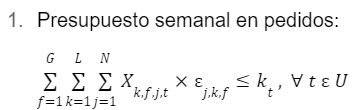

In [283]:

for t in periodos:
    presupuesto_semanal = next(p['millones'] for p in presupuesto if p['semana'] == t) * 1e6  # Convertir millones a unidades
    costo_compra = gp.quicksum(x[k, j, proveedor['nombre'], t] * proveedor['productos'][(k, j)]['precio_compra'] 
                               for proveedor in proveedores 
                               for k in productos_por_categoria 
                               for j in productos_por_categoria[k])    
    m.addConstr(costo_compra <= presupuesto_semanal, f"Presupuesto_Semanal_{t}")
    m.update()


Restricción 2: Satisfacción de la demanda

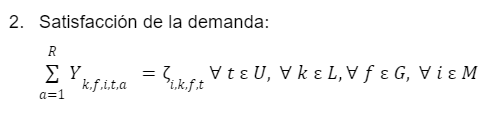

In [284]:
for cliente in clientes:
    nombre_cliente = cliente['nombre']
    demandas_cliente = cliente['demandas']
    for familia in productos_por_categoria:
        for producto in productos_por_categoria[familia]:
            for semana in periodos:
                m.addConstr(
                    gp.quicksum(y[familia, producto, nombre_cliente, camion['numero'], semana] for camion in camiones) ==
                    demandas_cliente[(familia, producto)][f'semana{semana}'],
                    f"Demanda_{nombre_cliente}_para_{familia}{producto}_semana{semana}"
                    
                )
m.update()


Restricción 3: Capacidad máxima de almacenamiento

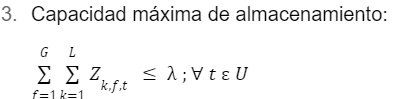

In [285]:
for t in periodos:
    m.addConstr(gp.quicksum(z[i, j, t] for i in productos_por_categoria for j in productos_por_categoria[i]) <= bodega['capacidad_litros'], f"Capacidad_Almacenamiento_{t}")

Restricción 4: Capacidad de venta de los proveedores

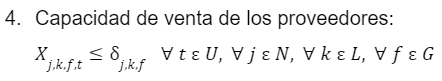

In [286]:

for proveedor in proveedores:
    nombre_proveedor = proveedor['nombre']
    for f in productos_por_categoria:
        for k in productos_por_categoria[f]:
            if (f, k) in proveedor['productos']:
                for t in periodos:
                    m.addConstr(
                        x[f, k, nombre_proveedor, t] <= proveedor['productos'][(f, k)]['produccion_maxima_por_semana'],
                        name=f"Capacidad_venta_proveedor_{nombre_proveedor}{f}{k}_{t}"
                    )
m.update()



Restricción 5: Capacidad de transporte por camión

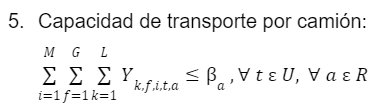

In [287]:
for t in periodos:
    for camion in camiones:
        m.addConstr(
            gp.quicksum(y[f, k, cliente['nombre'], camion['numero'], t] for cliente in clientes for f in productos_por_categoria for k in productos_por_categoria[f]) <= camion['capacidad_transporte'],
            name=f"Capacidad_transporte_camion_{camion['numero']}_{t}"
        )


Restricción 6: Productos Almacenados

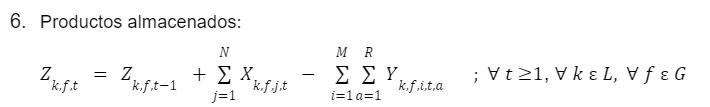

In [288]:
for f in productos_por_categoria:
    for k in productos_por_categoria[f]:
        for t in periodos:
            if t == 0:
                m.addConstr(
                    z[f, k, t] == gp.quicksum(x[f, k, proveedor['nombre'], t] for proveedor in proveedores) - gp.quicksum(y[f, k, cliente['nombre'], camion['numero'], t] for cliente in clientes for camion in camiones),
                    name=f"Productos_almacenados_{f}{k}{t}"
                )
            else:
                m.addConstr(
                    z[f, k, t] == z[f, k, t-1] + gp.quicksum(x[f, k, proveedor['nombre'], t] for proveedor in proveedores) - gp.quicksum(y[f, k, cliente['nombre'], camion['numero'], t] for cliente in clientes for camion in camiones),
                    name=f"Productos_almacenados_{f}{k}{t}"
                )
m.update()


Restriccion 7

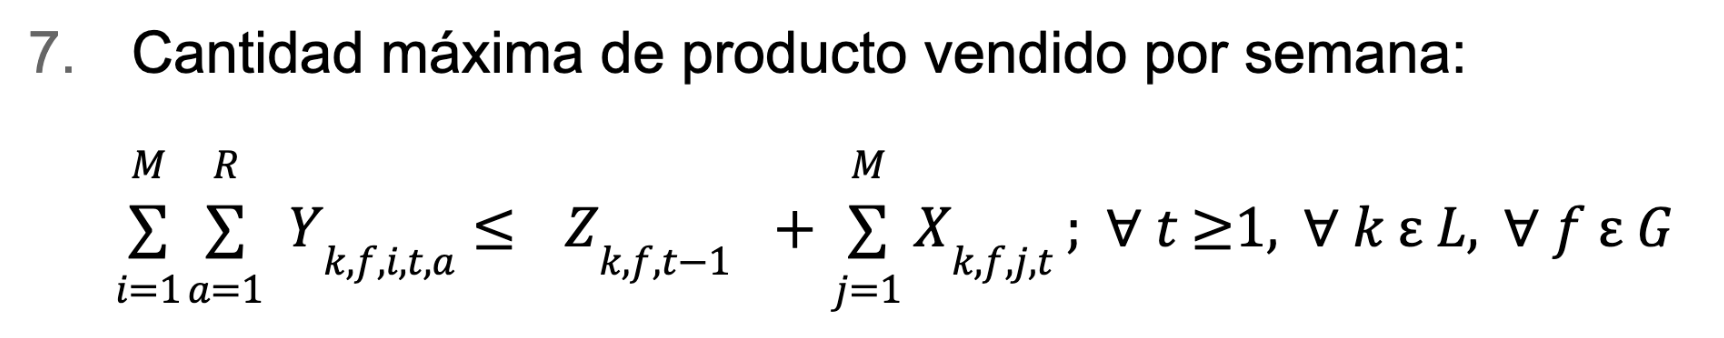

In [289]:
for f in productos_por_categoria:
    for k in productos_por_categoria[f]:
        for t in periodos:
            if t > 0:
                m.addConstr(
                    gp.quicksum(y[f, k, cliente['nombre'], camion['numero'], t] for cliente in clientes) <= 
                    z[f, k, t-1] + gp.quicksum(x[f, k, proveedor['nombre'], t] for proveedor in proveedores)
                )
            else:
                m.addConstr(
                    gp.quicksum(y[f, k, cliente['nombre'], camion['numero'], t] for cliente in clientes) <= 
                    gp.quicksum(x[f, k, proveedor['nombre'], t] for proveedor in proveedores)
                )


4. Plantear funcion objetivo

FUNCIÓN OBJETIVO:

![Captura de pantalla 2024-05-26 230904.png](<attachment:Captura de pantalla 2024-05-26 230904.png>)
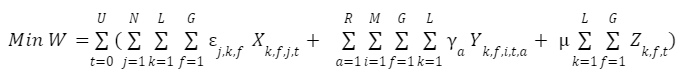

In [290]:
m.setObjective(
    gurobipy.quicksum(x[i, j, nombre_proveedor, t] * proveedor['productos'][(i, j)]['precio_compra']
                       for proveedor in proveedores
                       if proveedor['nombre'] == nombre_proveedor  
                       for i in productos_por_categoria
                       for j in productos_por_categoria[i]
                       for t in periodos) +
    gurobipy.quicksum( y[i,j,nombre_cliente,camion["numero"],t] * camion["costo_litro"]    
                       for i in productos_por_categoria
                       for j in productos_por_categoria[i]
                       for t in periodos
                       for camion in camiones

 ) +
    gurobipy.quicksum(bodega["costo_almacenamiento"] * z[i, j, t] for i in productos_por_categoria
                                                          for j in productos_por_categoria[i]
                                                          for t in periodos),
    GRB.MINIMIZE
)
m.update()


5. Resolver el modelo

In [291]:
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 648 rows, 1740 columns and 5722 nonzeros
Model fingerprint: 0xd9d7f76b
Coefficient statistics:
  Matrix range     [8e-01, 4e+00]
  Objective range  [1e+00, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 8e+06]
Presolve removed 312 rows and 371 columns
Presolve time: 0.01s
Presolved: 336 rows, 1369 columns, 4237 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8896250e+05   7.448438e+04   0.000000e+00      0s
     212    5.5171875e+05   0.000000e+00   0.000000e+00      0s

Solved in 212 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.517187500e+05


In [292]:
m.ObjVal

551718.75